In [1]:
import pandas as pd
import numpy as np
import pdb 
from datetime import datetime, timedelta
from dis import dis
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("prepped_data_with_lpips_similarity.csv")

In [9]:
data[(data["similarity_1back"] < 0.28) & (data["similarity_1back"] > 0.27)].head(10)

,Unnamed: 0,level_0,Unnamed: 0.1,index,user_id,score,current_labeling_state,response_submitted_at,problem_appeared_at,origin,...,2back_accuracy,3back_accuracy,1forward_accuracy,origin_file,shifted_origin_1back,shifted_origin_file_1back,shifted_origin_1forward,shifted_origin_file_1forward,similarity_1back,similarity_1forward
118910,118910,119189,11265,11317,23996,100,gold_standard,2020-05-12 12:45:39.201000+00:00,2020-05-12 12:45:38.423000+00:00,ISIC_0029862.jpeg,...,1,1,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0028504.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0026601.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.2755,0.4611
389200,389200,390871,409114,410701,46261,100,gold_standard,2020-09-04 17:39:27.459000+00:00,2020-09-04 17:39:26.167000+00:00,ISIC_0033409.jpeg,...,1,1,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0033717.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0025364.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.2785,0.4923
400469,400469,402196,296808,298090,46493,0,gold_standard,2020-08-09 06:11:26.657000+00:00,2020-08-09 06:11:24.698999+00:00,ISIC_0034205.jpeg,...,0,1,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0033120.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0034190.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.2742,0.3516


In [ ]:
import torch
import cv2

import vgg_loss

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

crit_vgg = vgg_loss.VGGLoss().to(device)

def get_similarity(image1, image2):

    img1 = cv2.imread(image1) / 255.0
    img2 = cv2.imread(image2) / 255.0
    img1 = cv2.resize(img1, (256,256))
    img2 = cv2.resize(img2, (256,256))
    img1 = torch.from_numpy(img1).to(device)
    img2 = torch.from_numpy(img2).to(device)
    img1 = img1.permute(2,0,1).unsqueeze(0).float()
    img2 = img2.permute(2,0,1).unsqueeze(0).float()

    loss = crit_vgg(img1, img2, target_is_features=False)
    return loss.item()

In [ ]:
a = get_similarity('../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/ISIC_0031663.jpeg', '../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/ISIC_0032596.jpeg')
# import os
# print(os.path.isfile('/Datasets/ISIC-Archive-Downloader/Data/img/Images/ISIC_0031663.jpeg'))
# a = cv2.imread('../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/ISIC_0031663.jpeg')
# b = cv2.imread('../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/ISIC_0031663.jpeg')

In [ ]:
x = get_similarity('../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/ISIC_0026165.jpeg', '../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/ISIC_0032596.jpeg')

In [2]:
data.head()

,Unnamed: 0,level_0,Unnamed: 0.1,index,user_id,score,current_labeling_state,response_submitted_at,problem_appeared_at,origin,...,2back_accuracy,3back_accuracy,1forward_accuracy,origin_file,shifted_origin_1back,shifted_origin_file_1back,shifted_origin_1forward,shifted_origin_file_1forward,similarity_1back,similarity_1forward
0,0,3,406213,407796,2,100,gold_standard,2020-09-04 16:34:37.391000+00:00,2020-09-04 16:34:34.810000+00:00,ISIC_0026165.jpeg,...,1,1,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0027127.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0029795.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.4171,0.4116
1,1,4,406215,407798,2,100,gold_standard,2020-09-04 16:34:39.990999+00:00,2020-09-04 16:34:38.653000+00:00,ISIC_0029795.jpeg,...,1,1,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0026165.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0031663.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.4116,0.4711
2,2,5,406222,407805,2,0,gold_standard,2020-09-04 16:34:48.517999+00:00,2020-09-04 16:34:41.907000+00:00,ISIC_0031663.jpeg,...,0,0,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0029795.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0032596.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.4711,0.4677
3,3,6,406225,407808,2,0,gold_standard,2020-09-04 16:34:51.782000+00:00,2020-09-04 16:34:50.275000+00:00,ISIC_0032596.jpeg,...,1,1,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0031663.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0029604.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.4677,0.4453
4,4,7,406227,407810,2,0,gold_standard,2020-09-04 16:34:53.345000+00:00,2020-09-04 16:34:52.808000+00:00,ISIC_0029604.jpeg,...,0,0,0,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0032596.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0028175.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.4453,0.4407


In [ ]:
data['origin'] = data['origin'].str.replace('.jpg', '.jpeg')
data['shifted_origin'] = data['origin'].shift(periods = 1)
data['origin_file'] = '../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/' + data['origin']
data['shifted_origin_file'] = '../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/' + data['shifted_origin']
data = data.dropna()
data['similarity'] = data.apply(lambda row: get_similarity(row['origin_file'], row['shifted_origin_file']), axis = 1)
data.head()
# data['similarity_bins'] = pd.cut(x=similarity, bins=np.arange(-200,210,10))
# data_per_bin = data.groupby(['similarity_bins']).mean()

In [2]:
similarity_1forward_max = data['similarity_1forward'].max()
similarity_1forward_min = data['similarity_1forward'].min()
print(similarity_1forward_max,similarity_1forward_min)

data['similarity_bins_1back'] = pd.cut(x=data['similarity_1back'], bins=np.arange(0, 0.76, 0.01))
data['similarity_bins_1forward'] = pd.cut(x=data['similarity_1forward'], bins=np.arange(0, 0.76, 0.01))
data_per_bin_b = data.groupby(['similarity_bins_1back']).mean()
data_per_bin_f = data.groupby(['similarity_bins_1forward']).mean()
similarity_sorted = data.sort_values(by='similarity_1forward', ascending=False)
data_per_bin_b

0.7494 0.0


,Unnamed: 0,level_0,Unnamed: 0.1,index,user_id,score,RT,1back_accuracy,2back_accuracy,3back_accuracy,1forward_accuracy,similarity_1back,similarity_1forward
similarity_bins_1back,,,,,,,,,,,,,
"(0.0, 0.01]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0.01, 0.02]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0.02, 0.03]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0.03, 0.04]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0.04, 0.05]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(0.7, 0.71]",431831.878378,433884.337838,389007.324324,390383.324324,45519.864865,74.324324,1.364013,0.527027,0.513514,0.567568,0.405405,0.704553,0.565500
"(0.71, 0.72]",367079.029412,368716.029412,349456.705882,350719.470588,42098.323529,70.588235,1.967118,0.529412,0.588235,0.500000,0.441176,0.713532,0.575994
"(0.72, 0.73]",448201.153846,450303.230769,430761.153846,432241.000000,47963.692308,69.230769,2.086769,0.538462,0.384615,0.461538,0.384615,0.723854,0.570731


In [36]:
data_per_bin_b1 = data.groupby(['similarity_bins_1back']).count()
data_per_bin_f1 = data.groupby(['similarity_bins_1forward']).count()
data_per_bin_b1[30:70]

,Unnamed: 0,level_0,Unnamed: 0.1,index,user_id,score,current_labeling_state,response_submitted_at,problem_appeared_at,origin,...,3back_accuracy,1forward_accuracy,origin_file,shifted_origin_1back,shifted_origin_file_1back,shifted_origin_1forward,shifted_origin_file_1forward,similarity_1back,similarity_1forward,similarity_bins_1forward
similarity_bins_1back,,,,,,,,,,,,,,,,,,,,,
"(0.3, 0.31]",29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
"(0.31, 0.32]",79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
"(0.32, 0.33]",186,186,186,186,186,186,186,186,186,186,...,186,186,186,186,186,186,186,186,186,186
"(0.33, 0.34]",452,452,452,452,452,452,452,452,452,452,...,452,452,452,452,452,452,452,452,452,451
"(0.34, 0.35]",963,963,963,963,963,963,963,963,963,963,...,963,963,963,963,963,963,963,963,963,963
"(0.35, 0.36]",1911,1911,1911,1911,1911,1911,1911,1911,1911,1911,...,1911,1911,1911,1911,1911,1911,1911,1911,1911,1909
"(0.36, 0.37]",3476,3476,3476,3476,3476,3476,3476,3476,3476,3476,...,3476,3476,3476,3476,3476,3476,3476,3476,3476,3473
"(0.37, 0.38]",5797,5797,5797,5797,5797,5797,5797,5797,5797,5797,...,5797,5797,5797,5797,5797,5797,5797,5797,5797,5794
"(0.38, 0.39]",8816,8816,8816,8816,8816,8816,8816,8816,8816,8816,...,8816,8816,8816,8816,8816,8816,8816,8816,8816,8810


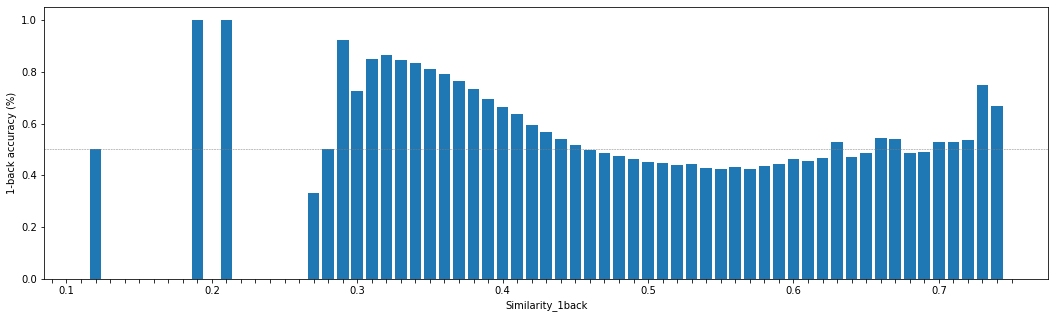

In [3]:
# PLOT 1: Similarity Barplot over all trials
y = data_per_bin_b['1back_accuracy']
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels1 = ['']*(len(x)+1)

temp = 0
numb = 0
while temp < len(x_labels1):
    x_labels1[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels1)
plt.bar(y_pos, y)
plt.ylabel('1-back accuracy (%)')
plt.xlabel('Similarity_1back')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()

# x-axis: -200: Previous image was very benign, 200: Previous image was very malignant
# y-axis: above 0.5 SD is apparent

In [46]:
hit_1back
lengths_1back
data_per_bin_b.index

CategoricalIndex([ (0.0, 0.01], (0.01, 0.02], (0.02, 0.03], (0.03, 0.04],
                  (0.04, 0.05], (0.05, 0.06], (0.06, 0.07], (0.07, 0.08],
                  (0.08, 0.09],  (0.09, 0.1],  (0.1, 0.11], (0.11, 0.12],
                  (0.12, 0.13], (0.13, 0.14], (0.14, 0.15], (0.15, 0.16],
                  (0.16, 0.17], (0.17, 0.18], (0.18, 0.19],  (0.19, 0.2],
                   (0.2, 0.21], (0.21, 0.22], (0.22, 0.23], (0.23, 0.24],
                  (0.24, 0.25], (0.25, 0.26], (0.26, 0.27], (0.27, 0.28],
                  (0.28, 0.29],  (0.29, 0.3],  (0.3, 0.31], (0.31, 0.32],
                  (0.32, 0.33], (0.33, 0.34], (0.34, 0.35], (0.35, 0.36],
                  (0.36, 0.37], (0.37, 0.38], (0.38, 0.39],  (0.39, 0.4],
                   (0.4, 0.41], (0.41, 0.42], (0.42, 0.43], (0.43, 0.44],
                  (0.44, 0.45], (0.45, 0.46], (0.46, 0.47], (0.47, 0.48],
                  (0.48, 0.49],  (0.49, 0.5],  (0.5, 0.51], (0.51, 0.52],
                  (0.52, 0.53], (0.53,

### 1-Back analysis before Merging two sides

/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in double_scalars
/home/zhren/anaconda3/lib/python3.7/site-packages/ipyke

<Figure size 432x288 with 0 Axes>

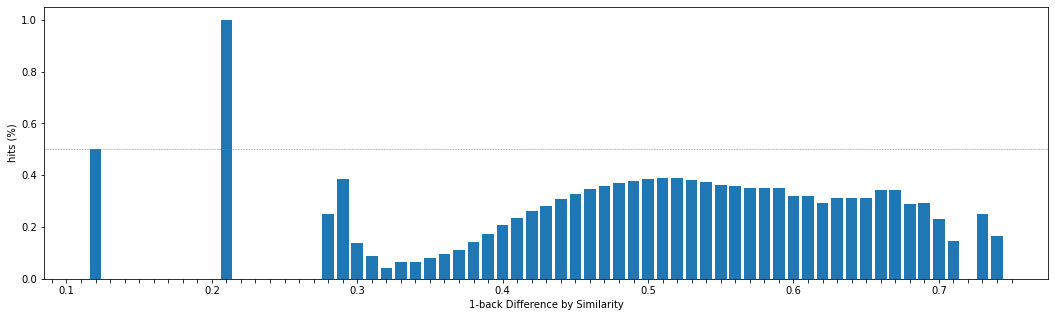

<Figure size 432x288 with 0 Axes>

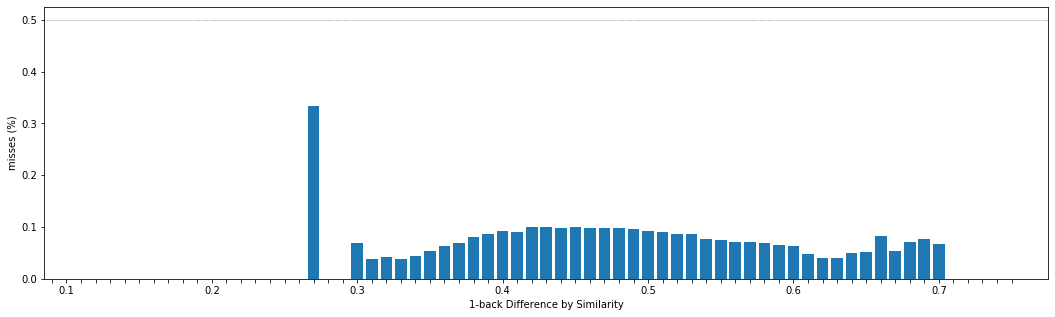

<Figure size 432x288 with 0 Axes>

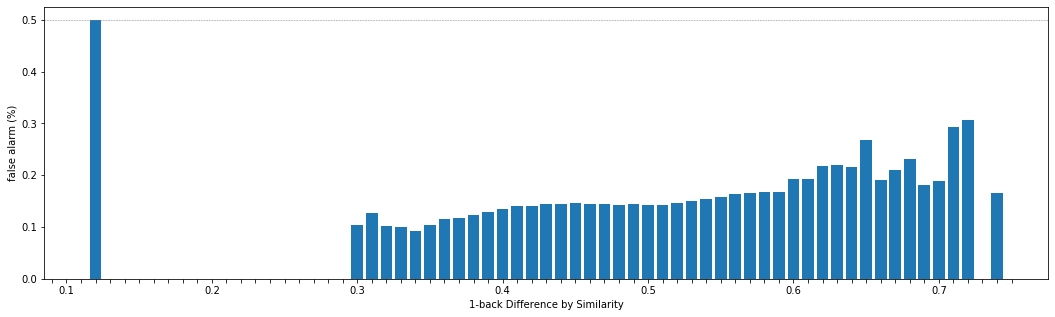

<Figure size 432x288 with 0 Axes>

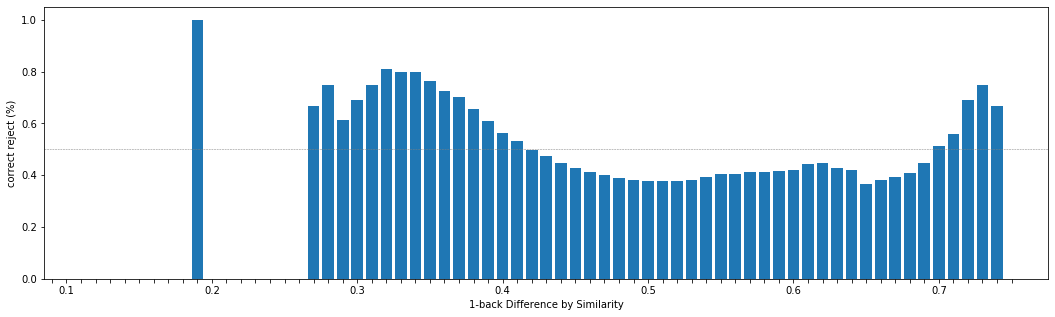

<Figure size 432x288 with 0 Axes>

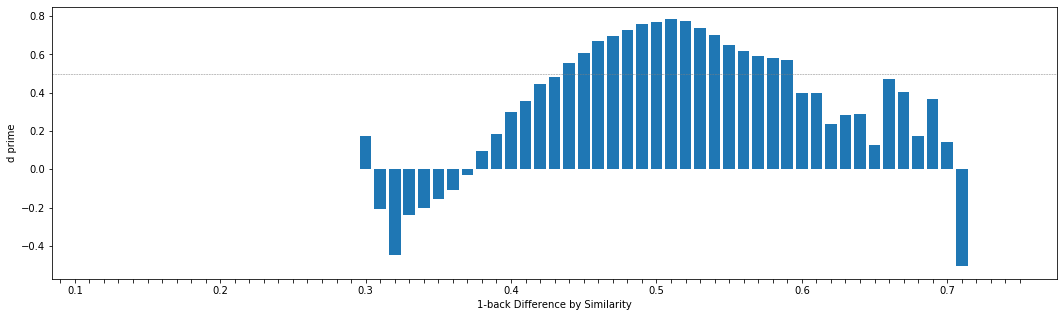

<Figure size 432x288 with 0 Axes>

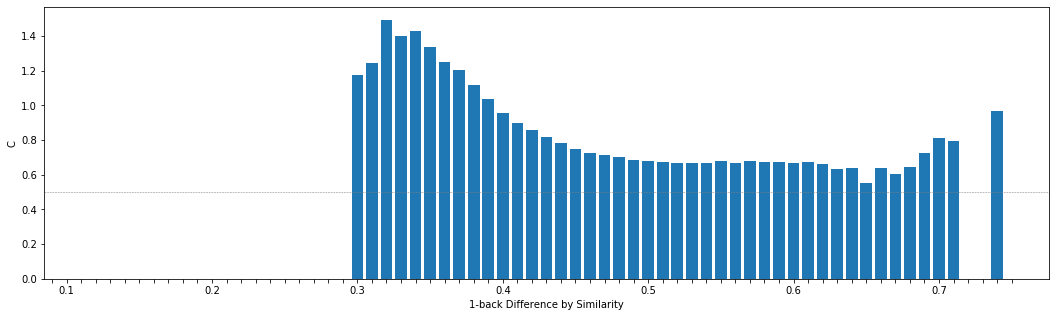

<Figure size 432x288 with 0 Axes>

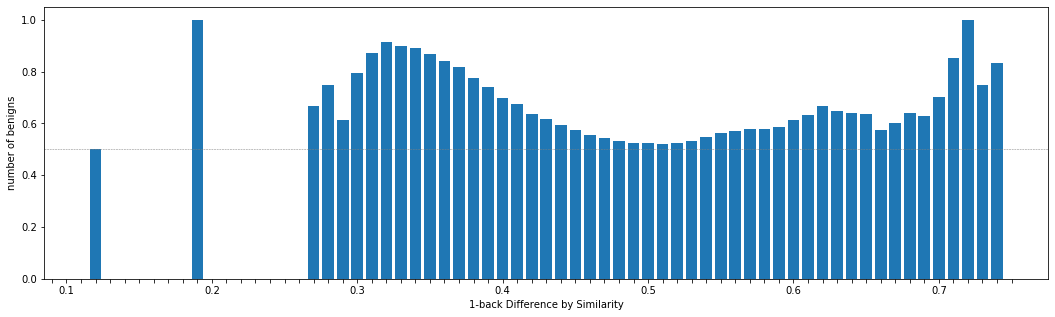

<Figure size 432x288 with 0 Axes>

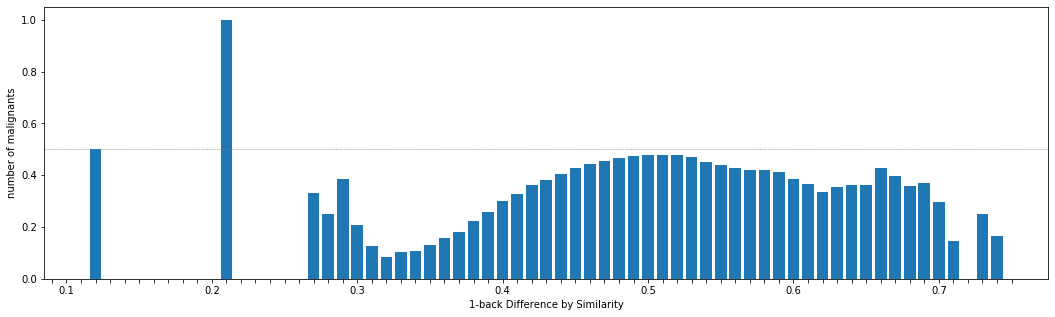

<Figure size 432x288 with 0 Axes>

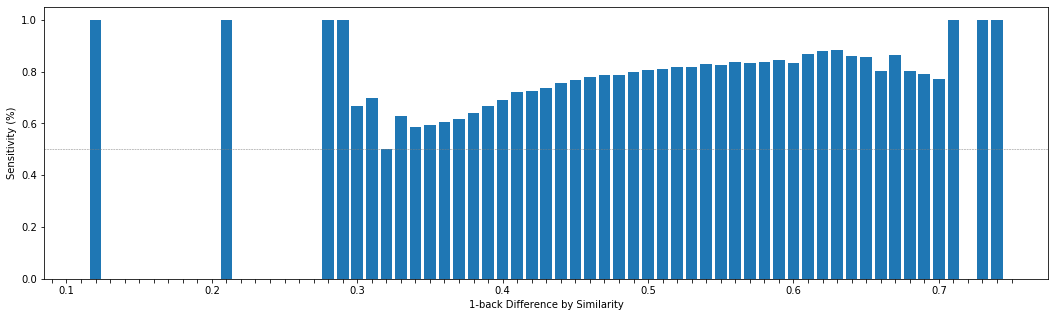

<Figure size 432x288 with 0 Axes>

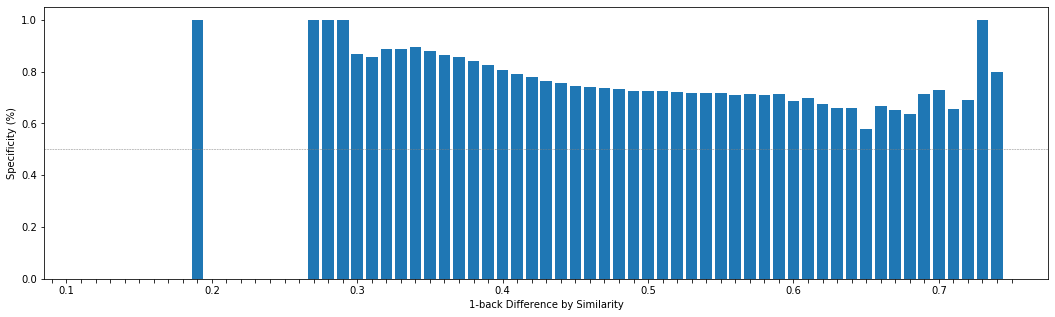

<Figure size 432x288 with 0 Axes>

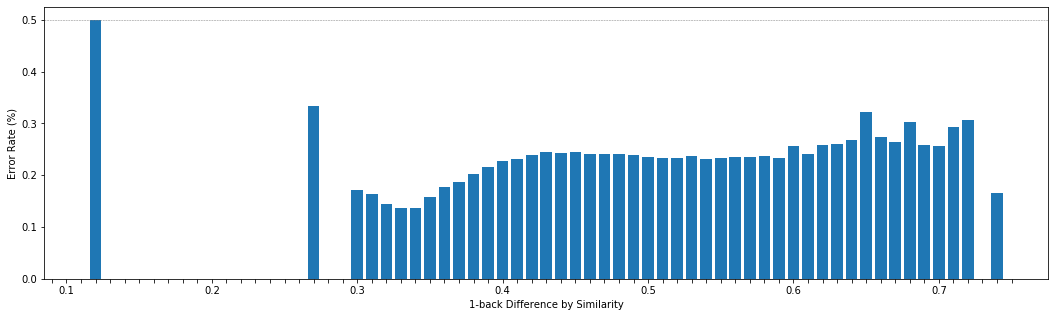

In [4]:
import scipy.stats as stats

hit_1back = []
miss_1back = []
FA_1back = []
CR_1back = []
lengths_1back = []
num_benign_1back = []
num_malignant_1back = []
sensitivity_1back = []
specificity_1back = []
error_rate_1back = []
# balance_rate = []
for start in np.arange(0, 0.75, 0.01):
    data_temp = data[data['similarity_bins_1back'] == pd.Interval(np.around(start, decimals=2, out=None), np.around(start + 0.01, decimals=2, out=None), closed='right')]
    lengths_1back.append(data_temp.shape[0])
    hit_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1back[-1])
    FA_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1back[-1])
    miss_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1back[-1])
    CR_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1back[-1])
#     hit_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
#     FA_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
#     miss_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
#     CR_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())

    num_benign_1back.append(FA_1back[-1] + CR_1back[-1])
    num_malignant_1back.append(hit_1back[-1] + miss_1back[-1])
    sensitivity_1back.append(hit_1back[-1] / (hit_1back[-1] + miss_1back[-1]))
    specificity_1back.append(CR_1back[-1] / (CR_1back[-1] + FA_1back[-1]))
    error_rate_1back.append(1 -(hit_1back[-1] + CR_1back[-1]))
#     balance_rate.append(num_malignant[-1]/num_benign[-1])
    
# PLOT 1: hits
plt.figure()
y = hit_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: miss
plt.figure()
y = miss_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 3: false alarm
plt.figure()
y = FA_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 4: correct reject
plt.figure()
y = CR_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 5: d'
plt.figure()
y_1back_d = [stats.norm.ppf(a) - stats.norm.ppf(b) for (a,b) in zip(hit_1back, FA_1back)]
# y_1back_d = [0 if a != a else a for a in y_1back_d]
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_d)
plt.ylabel('d prime')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y_1back_c = [-(stats.norm.ppf(a) + stats.norm.ppf(b))/2 for (a,b) in zip(hit_1back, FA_1back)]
# y_1back_c = [0 if a != a else a for a in y_1back_c]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_c)
plt.ylabel('C')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 7: benign samples
plt.figure()
y = num_benign_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('number of benigns')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 8: malignant samples
plt.figure()
y = num_malignant_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('number of malignants')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 9: sensitivity
plt.figure()
y = sensitivity_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Sensitivity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 10: Specificity
plt.figure()
y = specificity_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Specificity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 11: Error Rate
plt.figure()
y = error_rate_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Error Rate (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

### 1-Forward analysis before Mergeing two sides

/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in d

<Figure size 432x288 with 0 Axes>

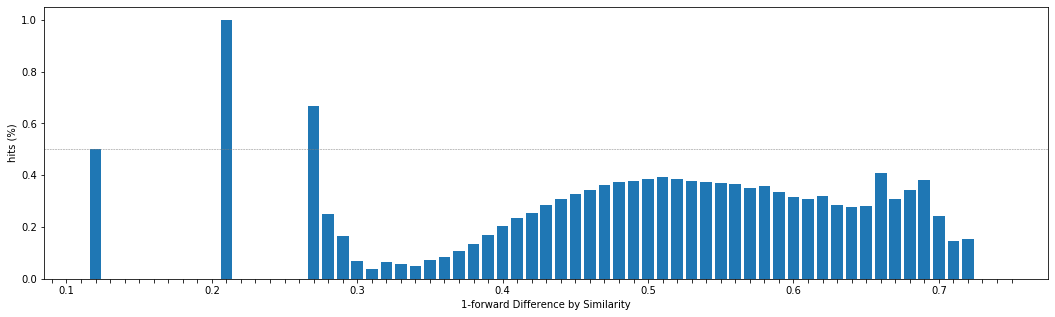

<Figure size 432x288 with 0 Axes>

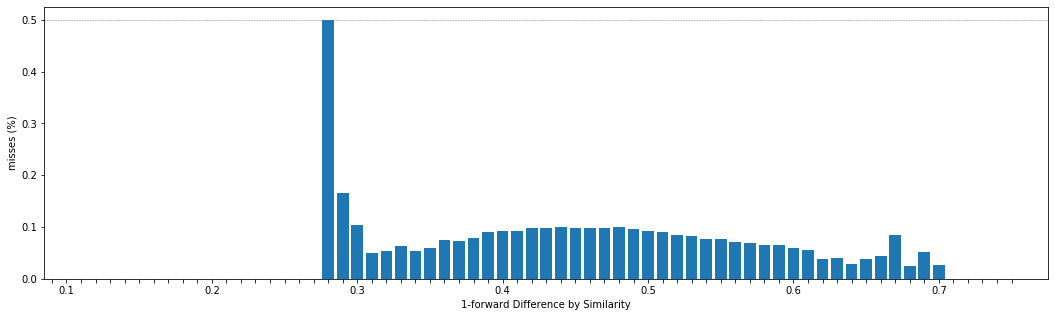

<Figure size 432x288 with 0 Axes>

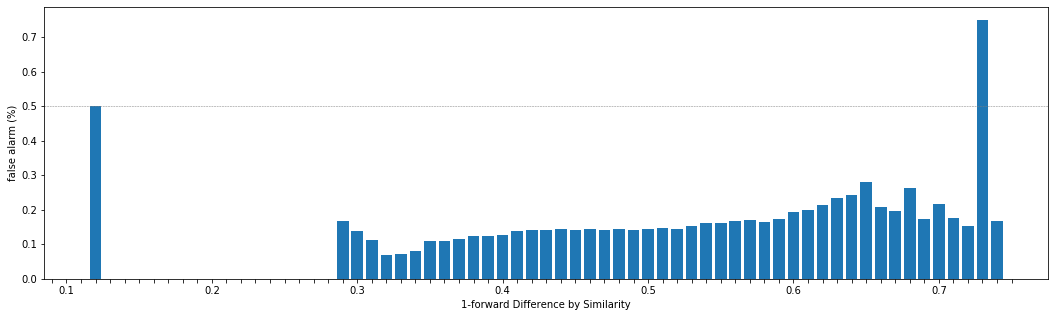

<Figure size 432x288 with 0 Axes>

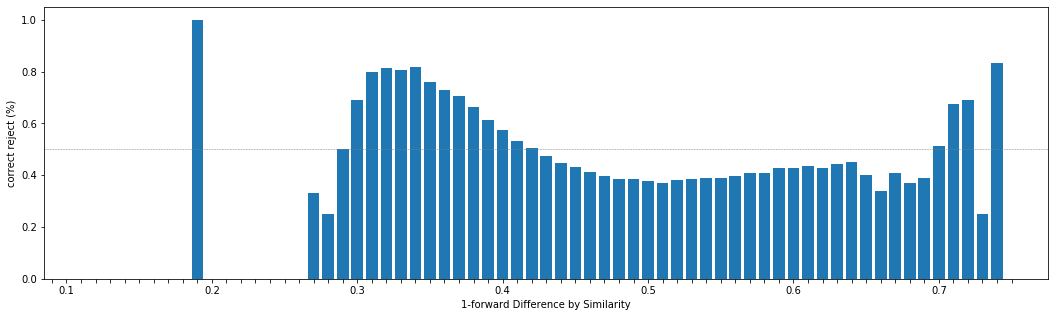

<Figure size 432x288 with 0 Axes>

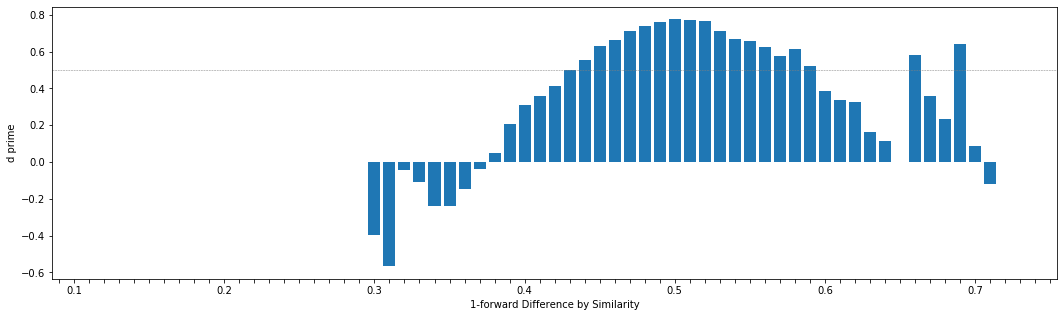

<Figure size 432x288 with 0 Axes>

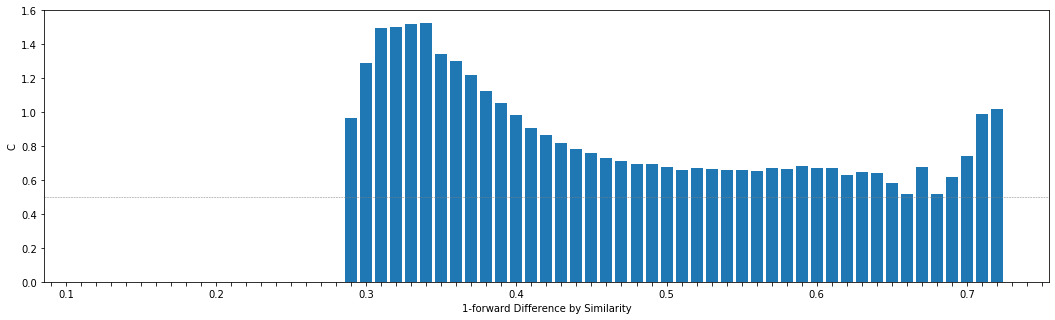

<Figure size 432x288 with 0 Axes>

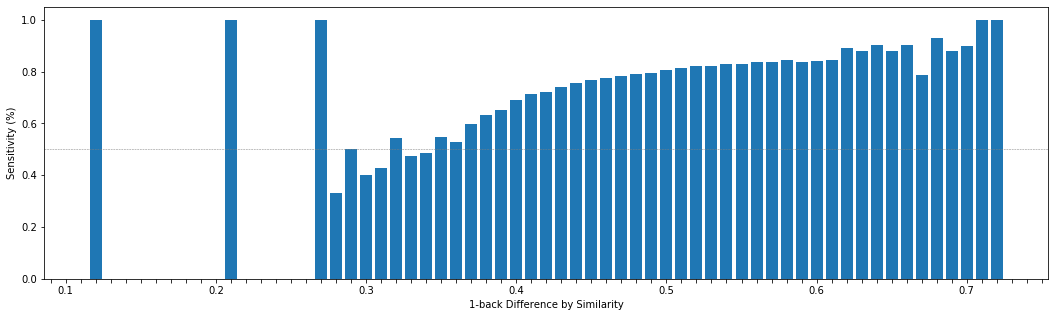

<Figure size 432x288 with 0 Axes>

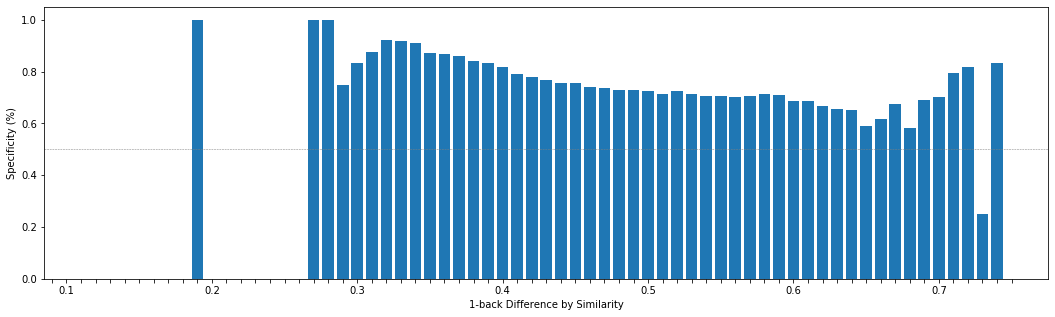

<Figure size 432x288 with 0 Axes>

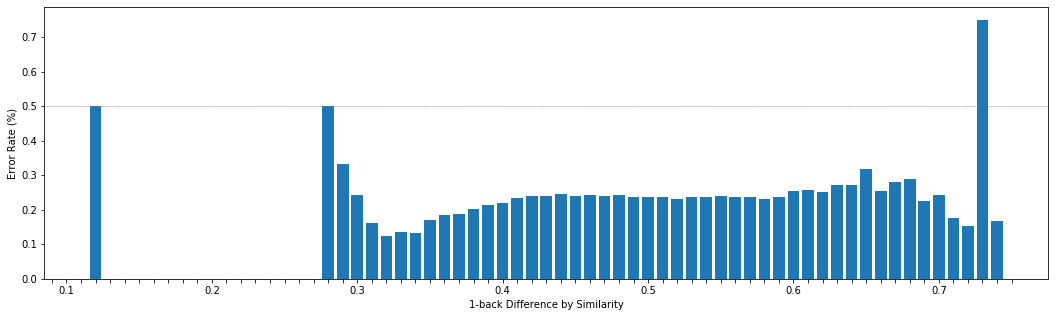

In [5]:
hit_1forward = []
miss_1forward = []
FA_1forward = []
CR_1forward = []
lengths_1forward = []
sensitivity_1forward = []
specificity_1forward = []
error_rate_1forward = []

num_benign_1forward = []
num_malignant_1forward = []
for start in np.arange(0,0.75,0.01):
    data_temp = data[data['similarity_bins_1forward'] == pd.Interval(np.around(start, decimals=2, out=None), np.around(start + 0.01, decimals=2, out=None), closed='right')]
    lengths_1forward.append(data_temp.shape[0])
    hit_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1forward[-1])
    FA_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1forward[-1])
    miss_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1forward[-1])
    CR_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1forward[-1])
#     hit_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
#     FA_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
#     miss_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
#     CR_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
    
    num_benign_1forward.append(FA_1forward[-1] + CR_1forward[-1])
    num_malignant_1forward.append(hit_1forward[-1] + miss_1forward[-1])
    sensitivity_1forward.append(hit_1forward[-1] / (hit_1forward[-1] + miss_1forward[-1]))
    specificity_1forward.append(CR_1forward[-1] / (CR_1forward[-1] + FA_1forward[-1]))
    error_rate_1forward.append(1 -(hit_1forward[-1] + CR_1forward[-1]))

# PLOT 1: hits
plt.figure()
y = hit_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: miss
plt.figure()
y = miss_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 3: false alarm
plt.figure()
y = FA_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 4: correct reject
plt.figure()
y = CR_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 5: d'
plt.figure()
y_1forward_d = [stats.norm.ppf(a) - stats.norm.ppf(b) for (a,b) in zip(hit_1forward, FA_1forward)]
# y_1forward_d = [0 if a != a else a for a in y_1forward_d]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1forward_d)
plt.ylabel('d prime')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y_1forward_c = [-(stats.norm.ppf(a) + stats.norm.ppf(b))/2 for (a,b) in zip(hit_1forward, FA_1forward)]
# y_1forward_c = [0 if a != a else a for a in y_1forward_c]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1forward_c)
plt.ylabel('C')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 7: sensitivity
plt.figure()
y = sensitivity_1forward
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Sensitivity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 8: Specificity
plt.figure()
y = specificity_1forward
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Specificity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 9: Error Rate
plt.figure()
y = error_rate_1forward
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Error Rate (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

### Serial Dependence on 1-back accuracy before merging

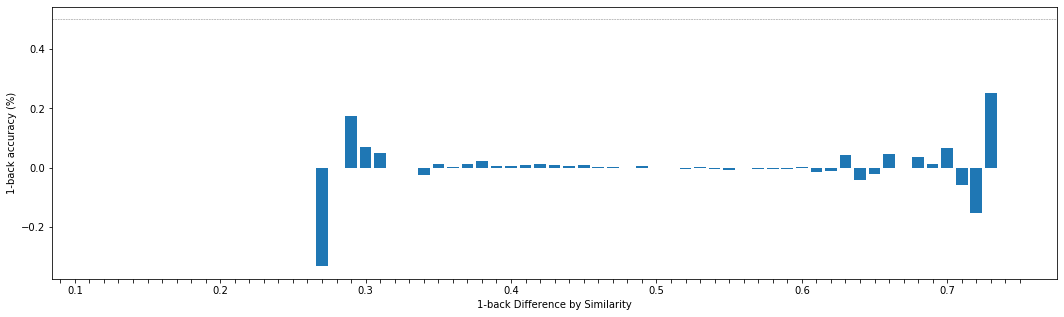

In [6]:
y = data_per_bin_b['1back_accuracy'] - data_per_bin_f['1forward_accuracy']
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('1-back accuracy (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()

### Serial Dependence Analysis after merging

sum of hits:nan
sum of miss:nan
sum of FA:nan
sum of CR:nan


/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in double_scalars
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


sum of sensitivity:nan
sum of specificity:nan
sum of error rate:nan


<Figure size 432x288 with 0 Axes>

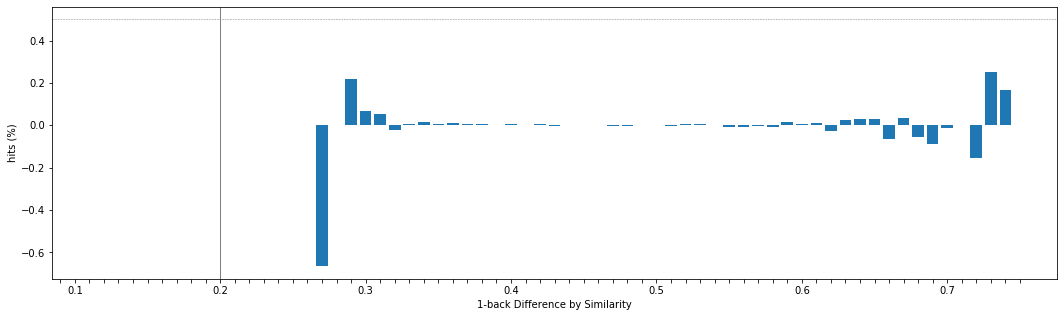

<Figure size 432x288 with 0 Axes>

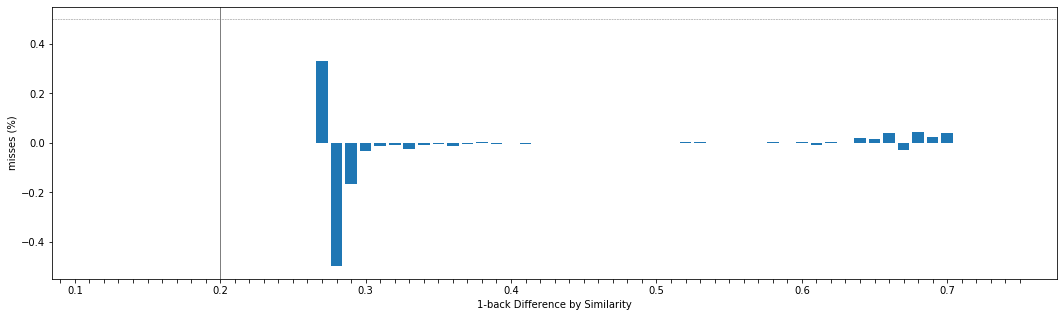

<Figure size 432x288 with 0 Axes>

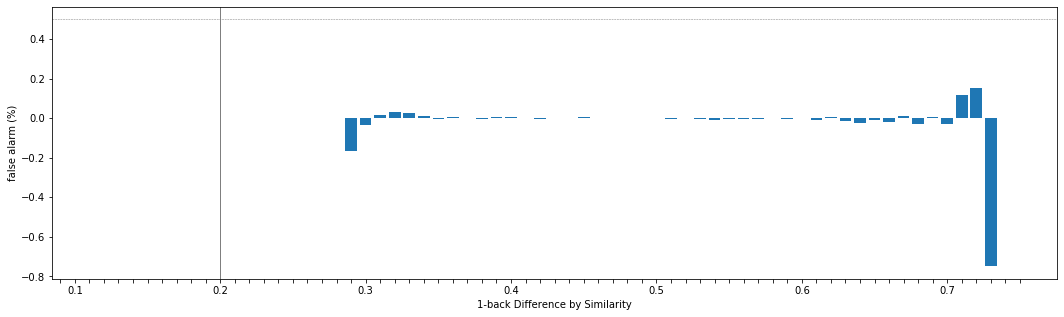

<Figure size 432x288 with 0 Axes>

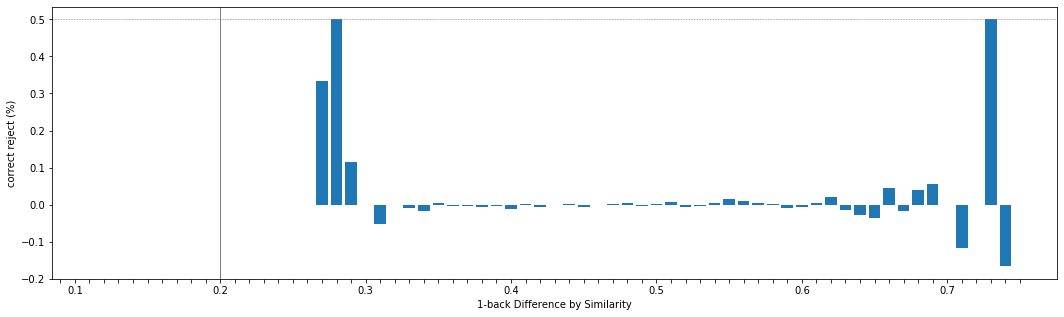

<Figure size 432x288 with 0 Axes>

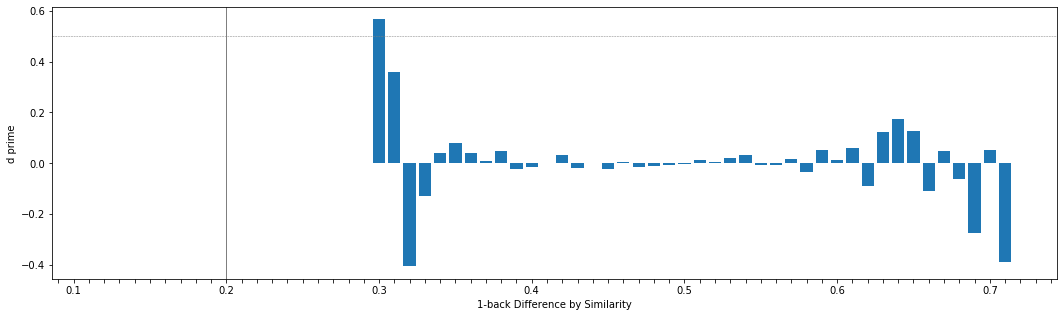

<Figure size 432x288 with 0 Axes>

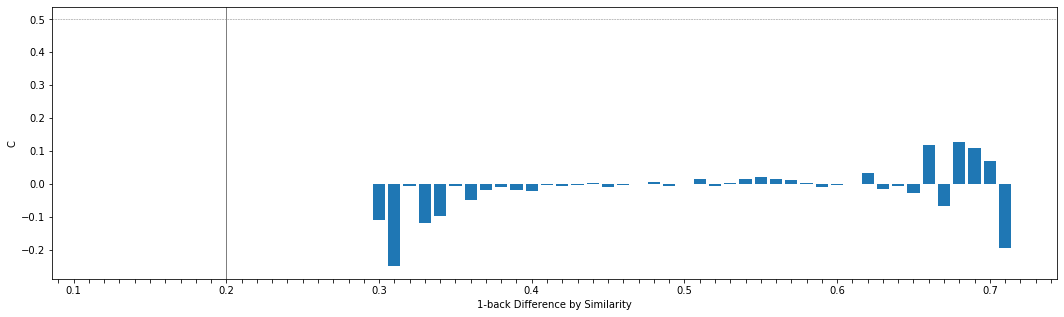

<Figure size 432x288 with 0 Axes>

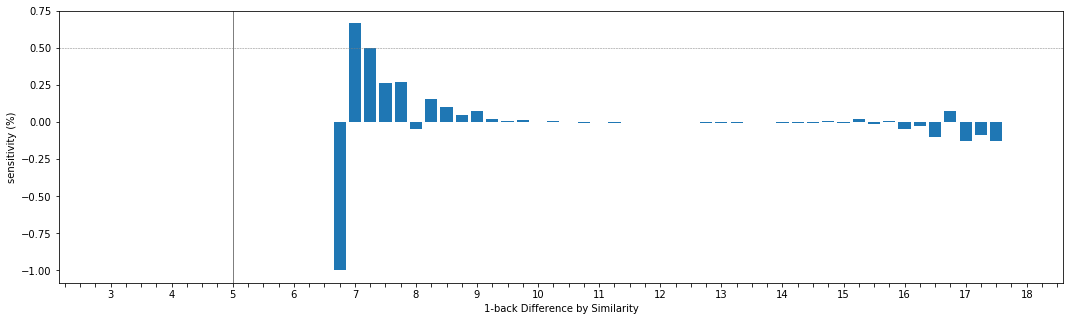

<Figure size 432x288 with 0 Axes>

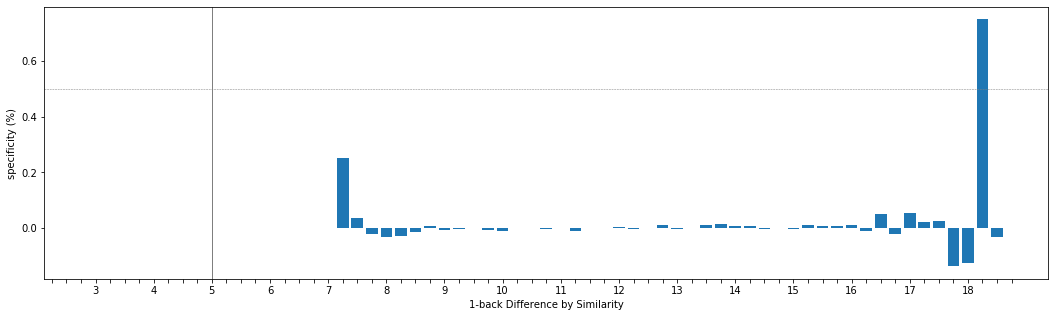

<Figure size 432x288 with 0 Axes>

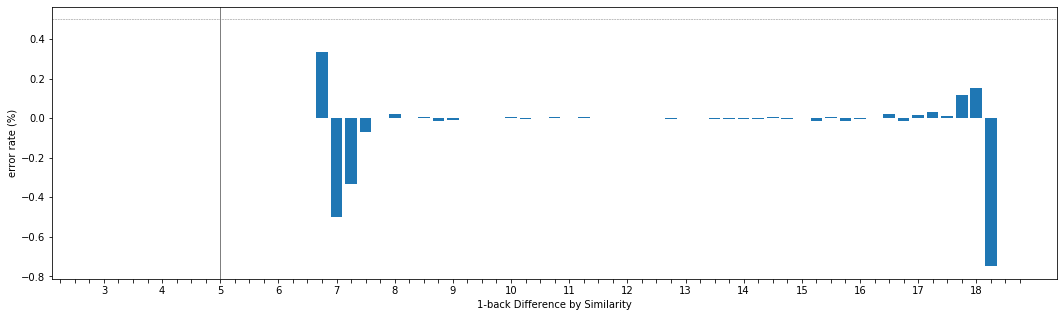

In [7]:
# lenth = data.shape[0]
# PLOT 1: hits
plt.figure()
y = [(a - b) for (a,b) in zip(hit_1back, hit_1forward)]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# plt.ylim([-0.001, 0.001])
print('sum of hits:' + str(sum(y)))

# PLOT 2: miss
plt.figure()
y = [(a - b) for (a,b) in zip(miss_1back, miss_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# plt.ylim([-0.001, 0.001])
print('sum of miss:' + str(sum(y)))

# PLOT 3: false alarm
plt.figure()
y = [(a - b) for (a,b) in zip(FA_1back, FA_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# plt.ylim([-0.001, 0.001])
print('sum of FA:' + str(sum(y)))

# PLOT 4: correct reject
plt.figure()
y = [(a - b) for (a,b) in zip(CR_1back, CR_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# plt.ylim([-0.001, 0.001])
print('sum of CR:' + str(sum(y)))

# PLOT 5: d'
plt.figure()
y = [a - b for (a,b) in zip(y_1back_d, y_1forward_d)]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('d prime')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y = [a - b for (a,b) in zip(y_1back_c, y_1forward_c)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('C')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 7: sensitivity
plt.figure()
y = [a - b for (a,b) in zip(sensitivity_1back, sensitivity_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('sensitivity (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# plt.ylim([-0.001, 0.001])
print('sum of sensitivity:' + str(sum(y)))

# PLOT 8: specificity
plt.figure()
y = [a - b for (a,b) in zip(specificity_1back, specificity_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('specificity (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# plt.ylim([-0.001, 0.001])
print('sum of specificity:' + str(sum(y)))

# PLOT 9: error rate
plt.figure()
y = [a - b for (a,b) in zip(error_rate_1back, error_rate_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('error rate (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# plt.ylim([-0.001, 0.001])
print('sum of error rate:' + str(sum(y)))